Missing values before handling:
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

Descriptive Statistics:
                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3  
count   561.000000   561.000000  561.000000  
mean    358.256364   420.988414   26.425062  
std     227.359117   271.287026   36.563094  
min      60.100000

C:\Users\deepi\AppData\Local\Temp\ipykernel_10504\1432361741.py:16: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



ValueError: Format 'html' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

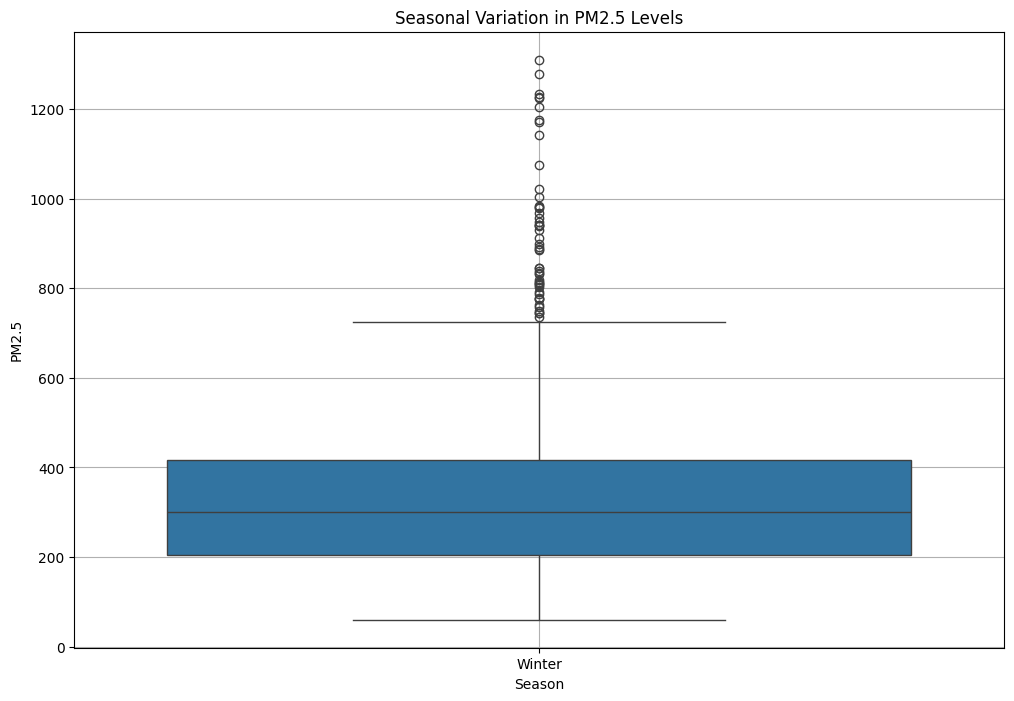

In [14]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Load the dataset
file_path = 'delhiaqi.csv'
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Check for missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Fill missing values (or handle them as needed)
data = data.fillna(method='ffill')  # Forward fill missing values

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Add a 'season' column based on the month
data['season'] = data.index.month % 12 // 3 + 1
data['season'] = data['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# Seasonal Variation Analysis using Plotly
seasonal_boxplot = px.box(data, x='season', y='pm2_5', title='Seasonal Variation in PM2.5 Levels',
                          labels={'season': 'Season', 'pm2_5': 'PM2.5'})
seasonal_boxplot.update_layout(yaxis_title='PM2.5', xaxis_title='Season')
seasonal_boxplot.write_html('seasonal_variation_pm25.html', auto_open=True)

# Time Series Analysis using Plotly
time_series_plot = px.line(data, x=data.index, y='pm2_5', title='PM2.5 Levels Over Time',
                          labels={'date': 'Date', 'pm2_5': 'PM2.5'})
time_series_plot.update_layout(xaxis_title='Date', yaxis_title='PM2.5')
time_series_plot.write_html('time_series_pm25.html', auto_open=True)

# Correlation Matrix Analysis using Plotly
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

correlation_heatmap = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='Viridis',
                                title='Correlation Matrix of Pollutants')
correlation_heatmap.update_layout(xaxis_title='Pollutants', yaxis_title='Pollutants')
correlation_heatmap.write_html('correlation_matrix_heatmap.html', auto_open=True)

print("\nPlots saved as HTML files:")
print("1. Seasonal Variation: 'seasonal_variation_pm25.html'")
print("2. Time Series: 'time_series_pm25.html'")
print("3. Correlation Matrix: 'correlation_matrix_heatmap.html'")
